# Analyse des sentiments  avec différents modèles de machine learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Restaurant_Reviews.tsv',sep='\t')

In [3]:
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


# Exploring Data

In [11]:
data['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

<AxesSubplot:xlabel='Liked', ylabel='count'>

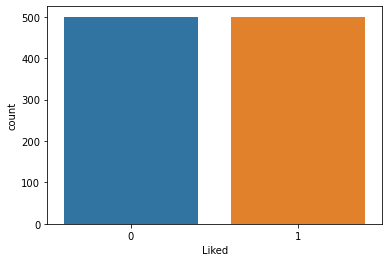

In [12]:
sns.countplot(x=data['Liked'])

In [13]:
data['Review Count']=data['Review'].apply(len)

In [14]:
data

,Review,Liked,Review Count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


In [15]:
data['Review Count'].idxmax()

985

In [16]:
data.loc[data['Review Count'].idxmax()][0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

# Pre-processing Data (NLTK Text Data Cleaning)

1) Importing the libraries of data cleaning

In [17]:
import spacy
from nltk import word_tokenize
from text_to_num import text2num
from spacy.lang.en.stop_words import STOP_WORDS as stopwords_en
import re
import contractions

2) Building a function to clean our data

In [18]:
def cleaning_data(txt):
    # 1  to lower
    txt_lower = txt.lower()

    # 2 expand the shortened words
    expanded_words = []
    for word in txt_lower.split():
        # using contractions.fix to expand the shortened words
        expanded_words.append(contractions.fix(word))
    expanded_text = ' '.join(expanded_words)

    # 3 convert numbers words to numbers numeric
    text = []
    for w in expanded_text.split():
        try:
            text.append(str(text2num(w, 'en')))
        except:
            text.append(w)
    txt_number_numeric = " ".join(text)

    # 4 remove all punctuations
    txt_nopunct = re.sub('[^a-zA-Z]', " ", txt_number_numeric)
    
    txt_nopunct =txt_nopunct.split()
    txt_nopunct=' '.join(txt_nopunct)

    # 5 remove stopwords
    #tokens = word_tokenize(txt_nopunct)
    #result = [i for i in tokens if not i in stopwords_en]
    #txt_nostopwords = " ".join(result)

    # 6 lemmatization
    nlp = spacy.load("en_core_web_sm")
    txt_lemma = []
    doc = nlp(txt_nopunct)
    for token in doc:
        txt_lemma.append(token.lemma_)
    return " ".join(txt_lemma)

3) Create a Review Cleaned  column

In [19]:
data['Review cleaned']=data['Review'].apply(cleaning_data)

In [20]:
data

,Review,Liked,Review Count,Review cleaned
0,Wow... Loved this place.,1,24,wow love this place
1,Crust is not good.,0,18,crust be not good
2,Not tasty and the texture was just nasty.,0,41,not tasty and the texture be just nasty
3,Stopped by during the late May bank holiday of...,1,87,stop by during the late may bank holiday off r...
4,The selection on the menu was great and so wer...,1,59,the selection on the menu be great and so be t...
...,...,...,...,...
995,I think food should have flavor and texture an...,0,66,I think food should have flavor and texture an...
996,Appetite instantly gone.,0,24,appetite instantly go
997,Overall I was not impressed and would not go b...,0,50,overall I be not impressed and would not go back
998,"The whole experience was underwhelming, and I ...",0,91,the whole experience be underwhelming and I th...


4) showing the difference between the cleaned Review and the normal Review

In [37]:
print('Normal Review :',data.loc[data['Review Count'].idxmax()][0],'\n')
print('Cleaned Review :',data.loc[data['Review Count'].idxmax()][3])

Normal Review : The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables). 

Cleaned Review : the problem I have be that they charge for a sandwich that be no big than a subway sub which offer well and more amount of vegetable


In [38]:
# Features & Labels
Xfeatures = data['Review cleaned']
ylabels = data['Liked']

In [39]:
#Split Dataset
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.2,random_state=42)

# Models Training & Building

In [40]:
# Load ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.svm import SVC

In [41]:
pipe_base = Pipeline(steps=[('cv',CountVectorizer()),('dummy',DummyClassifier())])
pipe_nb = Pipeline(steps=[('cv',CountVectorizer()),('nb',MultinomialNB())])
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_dt = Pipeline(steps=[('cv',CountVectorizer()),('dt',DecisionTreeClassifier())])
pipe_rf = Pipeline(steps=[('cv',CountVectorizer()),('rf',RandomForestClassifier(random_state=10000))])
pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('svm',SVC(kernel="rbf",C=100,gamma=0.01))])

## Our Models
1) Dummy Classifier
2) Multinomial naive bayes
3) Logistic Regression
4) Decision Tree Classifier
5) Random Forest Classifier
6) Support Vector Machine

In [42]:
pipe_base.fit(x_train,y_train)
pipe_nb.fit(x_train,y_train)
pipe_lr.fit(x_train,y_train)
pipe_dt.fit(x_train,y_train)
pipe_rf.fit(x_train,y_train)
pipe_svm.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('svm', SVC(C=100, gamma=0.01))])

## Best Model

In [43]:
#Accuracy
print("Dummy Classifier         : ",pipe_base.score(x_test,y_test))
print("Multinomial naive bayes  : ",pipe_nb.score(x_test,y_test))
print("Logistic Regression      : ",pipe_lr.score(x_test,y_test))
print("Decision Tree Classifier : ",pipe_dt.score(x_test,y_test))
print("Random Forest Classifier : ",pipe_rf.score(x_test,y_test))
print("Support vector machine   : ",pipe_svm.score(x_test,y_test))

Dummy Classifier         :  0.48
Multinomial naive bayes  :  0.78
Logistic Regression      :  0.77
Decision Tree Classifier :  0.765
Random Forest Classifier :  0.795
Support vector machine   :  0.77


the best model is Random Forest Classifier

# Model Prediction

In [50]:
y_pred = pipe_rf.predict(x_test)

In [51]:
y_pred

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1], dtype=int64)

In [52]:
y_test.values

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1], dtype=int64)

# Model Evaluation

In [53]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

In [54]:
print(confusion_matrix(y_test,y_pred))

[[81 15]
 [26 78]]


In [55]:
print(accuracy_score(y_test,y_pred))

0.795


In [56]:
# Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        96
           1       0.84      0.75      0.79       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.80      0.79       200



# Model Deployement & Production

In [57]:
import joblib

Save our model

In [58]:
joblib.dump(pipe_nb,'model_resturants.pkl')

['model_resturants.pkl']

Load our model

In [117]:
loaded_model=joblib.load('model_resturants.pkl')